,order_id,category,lat,lon,start_date,end_date,ol_number,FxOs,infra_index,infra_number,named_anchorage_s2id,named_anchorage_source,n_FxOs,label,label_confidence,duration_yrs,eez,sea,geometry
0,0,operating location,57.195509,1.961416,2018-08-10,2024-09-30,0,[232005797],"[131, 19541]","[1038348, 2817]",NaN,NaN,1,NaN,NaN,6.145205,United Kingdom,north_sea,POINT (1.96142 57.19551)
1,1,operating location,59.608367,1.076805,2017-09-19,2024-09-30,1,[232011493],[17299],[112164],NaN,NaN,1,NaN,NaN,7.035616,United Kingdom,north_sea,POINT (1.07681 59.60837)
2,3,operating location,61.583049,1.547039,2024-06-20,2024-09-30,3,[232038451],NaN,NaN,NaN,NaN,1,NaN,NaN,0.279452,United Kingdom,NaN,POINT (1.54704 61.58305)
3,4,operating location,58.323334,0.724695,2014-02-07,2015-08-12,4,[234148000],NaN,NaN,NaN,NaN,1,NaN,NaN,1.509589,United Kingdom,north_sea,POINT (0.72469 58.32333)
4,5,operating location,60.356657,-4.066840,2013-01-01,2024-03-26,5,"[234448000, 235101762]",[18661],[980429],4899d019,top_destination,2,NaN,NaN,11.238356,United Kingdom,NaN,POINT (-4.06684 60.35666)


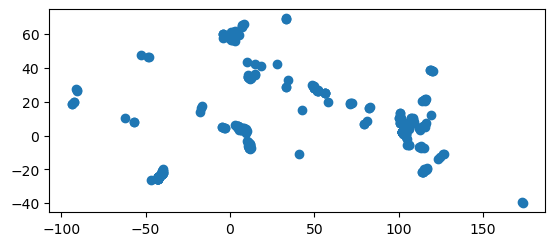

In [6]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("/Users/jonathanraphael/Downloads/inf_locations_v1_20241029.csv")
df["FxOs"] = df["FxOs"].apply(lambda x: x.split(",") if isinstance(x, str) else x)
mmsi_list = []
for _, row in df.iterrows():
    mmsi_list.extend(row["FxOs"])

mmsi_list = set(mmsi_list)


df["infra_number"] = df["infra_number"].apply(
    lambda x: x.split(",") if isinstance(x, str) else x
)
df["infra_index"] = df["infra_index"].apply(
    lambda x: x.split(",") if isinstance(x, str) else x
)
df["start_date"] = pd.to_datetime(df["start_date"], errors="coerce")
df["end_date"] = pd.to_datetime(df["end_date"], errors="coerce")
df["ol_number"] = pd.to_numeric(df["ol_number"], errors="coerce").fillna(0).astype(int)
df["n_FxOs"] = pd.to_numeric(df["n_FxOs"], errors="coerce").fillna(0).astype(int)
df["order_id"] = pd.to_numeric(df["order_id"], errors="coerce").fillna(0).astype(int)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

gdf.plot()
gdf.head()

In [7]:
len(mmsi_list)

301

In [3]:
import pandas as pd

df = pd.read_csv(
    "/Users/jonathanraphael/Downloads/pub_fxo_operating_locations_periods_v1_20241029.csv"
)
len(df["ssvid"].unique())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jonathanraphael/Downloads/pub_fxo_operating_locations_periods_v1_20241029.csv'

In [5]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("FxO_fxo_masterlist_uncompressed_v1_20241029.csv")
df["mmsi"] = df["mmsi"].astype(int)
len(df[df["mmsi"] > 0]["mmsi"].unique())
df["mmsi"].unique()

array([992571361, 775072000, 760000400, 710220000, 710073000, 672708000,
       672284000, 668116260, 657830000, 657819000, 657601000, 657485000,
       657430000, 657384000, 657270100, 657269800, 657246500, 657239800,
       657210000, 657203000, 657161000, 657126200, 657126100, 657011052,
       650000123, 642165063, 642122040, 642122000, 636023619, 636023435,
       636023117, 636022876, 636022398, 636021407, 636021222, 636021221,
       636019750, 636019531, 636019527, 636018944, 636018174, 636018087,
       636018074, 636018033, 636018032, 636017940, 636017939, 636017705,
       636017704, 636017688, 636017687, 636017131, 636017063, 636015683,
       636015533, 636015145, 636015080, 636015042, 636014938, 636014671,
       636014582, 636014487, 636014397, 636014380, 636013537, 636013154,
       636013145, 636012580, 636012462, 636011800, 636011799, 636010539,
       636010329, 636010178, 636009993, 636009681, 636009608, 636008904,
       636008526, 636008475, 636007757, 636007731, 

In [19]:
trips = []
for _, row in gdf[gdf["category"] == "operating location"].iterrows():
    order_id = row["order_id"]
    structure_id = row["infra_number"]
    fxo = row["FxOs"]
    if pd.isna(structure_id) or pd.isna(fxo):
        continue
    if "," in structure_id:
        structure_ids = structure_id.split(",")
    else:
        structure_ids = [structure_id]
    if "," in fxo:
        fxos = fxo.split(",")
    else:
        fxos = [fxo]
    for structure_id in structure_ids:
        for fxo in fxos:
            trips.append((order_id, structure_id, fxo))

trips

[(0, '1038348', '232005797'),
 (0, '2817', '232005797'),
 (1, '112164', '232011493'),
 (5, '980429', '234448000'),
 (5, '980429', '235101762'),
 (9, '147298', '234497000'),
 (13, '457294', '235010630'),
 (14, '152654', '235107000'),
 (15, '1040285', '235599000'),
 (15, '77739', '235599000'),
 (16, '794763', '247256000'),
 (16, '230561', '247256000'),
 (16, '827561', '247256000'),
 (17, '256263', '247311500'),
 (18, '512664', '247311900'),
 (22, '132801', '247323700'),
 (22, '586790', '247323700'),
 (25, '835151', '257069000'),
 (25, '385864', '257069000'),
 (27, '613122', '257093000'),
 (28, '512624', '257161000'),
 (29, '288506', '257804000'),
 (31, '515377', '258277000'),
 (31, '955937', '258277000'),
 (32, '204384', '259644000'),
 (36, '177600', '306081000'),
 (40, '164723', '306239000'),
 (41, '374948', '306483000'),
 (44, '985447', '306811000'),
 (44, '302798', '306811000'),
 (45, '281572', '308108000'),
 (46, '263882', '308297000'),
 (46, '597907', '308297000'),
 (47, '819202', '

In [20]:
mmsis = []
for _, row in gdf[gdf["category"] == "operating location"].iterrows():
    fxo = row["FxOs"]
    if pd.isna(structure_id) or pd.isna(fxo):
        continue
    if "," in fxo:
        fxos = fxo.split(",")
    else:
        fxos = [fxo]
    for fxo in fxos:
        mmsis.append(fxo)

mmsis

['232005797',
 '232011493',
 '232038451',
 '234148000',
 '234448000',
 '235101762',
 '234448000',
 '234497000',
 '235010630',
 '235107000',
 '235599000',
 '247256000',
 '247311500',
 '247311900',
 '247323700',
 '249320000',
 '257069000',
 '257093000',
 '257161000',
 '257804000',
 '258277000',
 '259644000',
 '273387920',
 '273414140',
 '306081000',
 '306081000',
 '306101000',
 '306101000',
 '538004129',
 '306239000',
 '306483000',
 '306811000',
 '306811000',
 '308108000',
 '308297000',
 '308384000',
 '308419000',
 '308424000',
 '308496000',
 '308626000',
 '308788000',
 '308944000',
 '308944000',
 '309123000',
 '309227000',
 '309275000',
 '309309000',
 '309493000',
 '309499000',
 '309669000',
 '309745000',
 '309776000',
 '309817000',
 '309864000',
 '310480000',
 '310484000',
 '310489000',
 '310509000',
 '310509000',
 '310509000',
 '310509000',
 '310509000',
 '310509000',
 '310526000',
 '310561000',
 '563086300',
 '311000019',
 '311000116',
 '311000132',
 '311000143',
 '311000245',
 '3110